In [1]:
import pytesseract
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import numpy as np
import time
from IPython.display import display, Image, clear_output
from tqdm import tqdm

In [2]:
# ign = "Tetsuro"
ign = "kkaNbu"

In [91]:
def imshow(img):
    _, buf = cv2.imencode(".jpg", img)
    display(Image(data=buf.tobytes()))
    clear_output(wait=True)

In [3]:
def proc(img_raw):
    height = img_raw.shape[0]
    width = img_raw.shape[1]

    height, width, channels = img_raw.shape[:3]
    img = img_raw[int(height*0.5):int(height*1.0), int(width*0.3):int(width*0.7)]
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    hsv_min = np.array([90,10,150])
    hsv_max = np.array([120,255,255])

    mask = cv2.inRange(hsv, hsv_min, hsv_max)
    dst1 = cv2.bitwise_and(img, img, mask=mask)

    plt.imshow(dst1)    

    str_img = dst1
    str_data = pytesseract.image_to_string(str_img)
    return str_data

In [ ]:
img = cv2.imread('test_full_2.png')  
result = proc(img)
print(result)
print(ign in result)

329


Processing Frames:  92%|█████████▏| 304/329 [00:03<00:00, 84.60it/s] 


detected count = 0


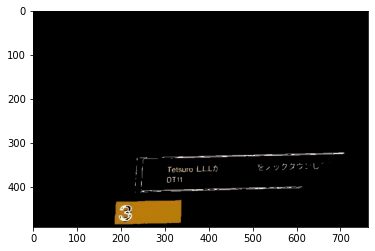

In [4]:
# 設定に関わる変数
ign = "kkaNbu"
frame_freq = 1.0

# 変数の初期化
frame_count = 0
detected_count = 0

cap = cv2.VideoCapture("./kanbu_2.mp4")
# フレームレートを取得
fps = cap.get(cv2.CAP_PROP_FPS)
# 総フレーム数を取得
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print(total_frames)

progress_bar = tqdm(total=total_frames, desc="Processing Frames")

while True:
    try:
        # フレームの読み込み
        ret, frame = cap.read()
        # フレームが読み込めなくなったら終了
        if not ret:
            break

        current_time_ms = cap.get(cv2.CAP_PROP_POS_MSEC)

        # 指定した時間ごとにフレームを抽出
        if frame_count % int(fps*frame_freq) == 0:
            current_time_sec = current_time_ms / 1000
            # print(f"フレーム {frame_count // int(fps)}: 現在の再生時間 {current_time_sec}秒")
            result = proc(frame)
            if (ign in result):
                # print("detected")
                minutes, seconds = divmod(current_time_sec, 60)
                print(f"フレーム {frame_count // int(fps)}: 現在の再生時間 {int(minutes)}分 {seconds:.2f}秒")
                detected_count += 1
                detected = True
                new_frame_pos = int(cap.get(cv2.CAP_PROP_POS_FRAMES) + fps * 10)
                if new_frame_pos <= total_frames:
                    cap.set(cv2.CAP_PROP_POS_FRAMES, new_frame_pos)
                
        frame_count += 1
        progress_bar.update(1)

    except KeyboardInterrupt:
        break

cap.release()
progress_bar.close()

print("detected count = " + str(detected_count))